In [2]:
import numpy as np
import pandas as pd
import json
import os
import seaborn as sb
from matplotlib import pyplot as plt, rcParams

%matplotlib inline
#rcParams['figure.figsize'] = 5, 4

In [3]:
data = {"year": [], "commit_sha": [], "total_lines": [], "code_lines": [],
        "blank_lines": [],
        "comment_lines": [],
        "complexity": [],
        }
for file in os.scandir("data/LOC_and_Complexity"):
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for language in data_file:
            if language["Name"] == "C" or language["Name"] == "C++":
                print(language)
                #appends last so order is maintained
                data["year"].append(file.name[:4])
                data["commit_sha"].append(file.name[9:16])
                data["total_lines"].append(language["Lines"])
                data["blank_lines"].append(language["Blank"])
                data["comment_lines"].append(language["Comment"])
                data["code_lines"].append(language["Code"])
                data["complexity"].append(language["Complexity"])

data

data = pd.DataFrame(data)
data

{'Name': 'C', 'Bytes': 851678, 'CodeBytes': 0, 'Lines': 25631, 'Code': 17778, 'Comment': 4609, 'Blank': 3244, 'Complexity': 4079, 'Count': 32, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 934718, 'CodeBytes': 0, 'Lines': 28353, 'Code': 19825, 'Comment': 5016, 'Blank': 3512, 'Complexity': 4667, 'Count': 35, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1012838, 'CodeBytes': 0, 'Lines': 31195, 'Code': 22093, 'Comment': 5255, 'Blank': 3847, 'Complexity': 5422, 'Count': 37, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1099575, 'CodeBytes': 0, 'Lines': 33049, 'Code': 23333, 'Comment': 5630, 'Blank': 4086, 'Complexity': 5879, 'Count': 37, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1130411, 'CodeBytes': 0, 'Lines': 33954, 'Code': 23842, 'Comment': 5847, 'Blank': 4265, 'Complexity': 6004, 'Count': 38, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1128557, 'CodeBytes': 0, 'Lines': 33726, 'Code': 23712, 'Comment': 57

,year,commit_sha,total_lines,code_lines,blank_lines,comment_lines,complexity
0,2012,3b62de3,25631,17778,3244,4609,4079
1,2013,f044635,28353,19825,3512,5016,4667
2,2014,c34dd6b,31195,22093,3847,5255,5422
3,2015,67bd7d4,33049,23333,4086,5630,5879
4,2016,c23ead2,33954,23842,4265,5847,6004
5,2017,7ab96cc,33726,23712,4241,5773,5904
6,2018,b29110c,31529,22149,4040,5340,5571
7,2019,b8b04e3,33607,23056,4463,6088,5911
8,2020,bb51a8b,31248,20497,4386,6365,6381
9,2021,827170f,32017,20976,4488,6553,6474


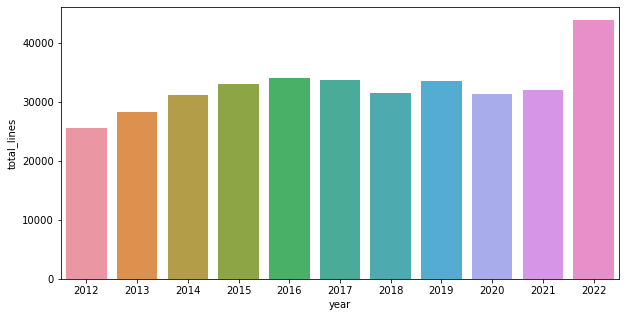

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.barplot(x="year", y="total_lines", data=data, ax=axes)

#sb.barplot(x="year", y="comment_lines", data=data)
fig.savefig("figures/LOC/scc_year_vs_total_lines.jpg")

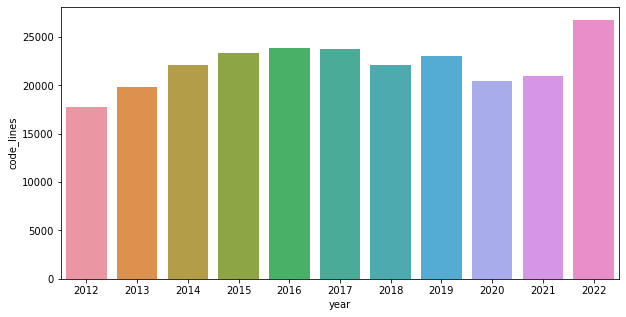

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.barplot(x="year", y="code_lines", data=data, ax=axes)

#sb.barplot(x="year", y="comment_lines", data=data)
fig.savefig("figures/LOC/scc_year_vs_code_lines.jpg")

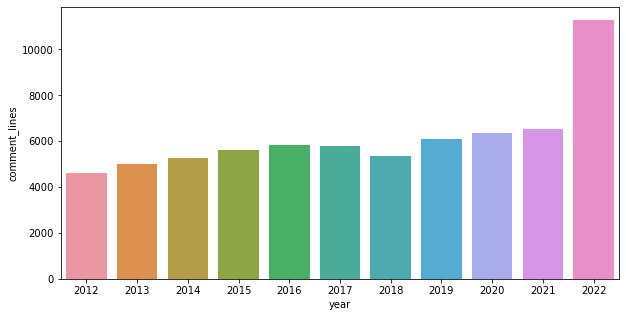

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.barplot(x="year", y="comment_lines", data=data, ax=axes)
fig.savefig("figures/LOC/scc_year_vs_comment_lines.jpg")

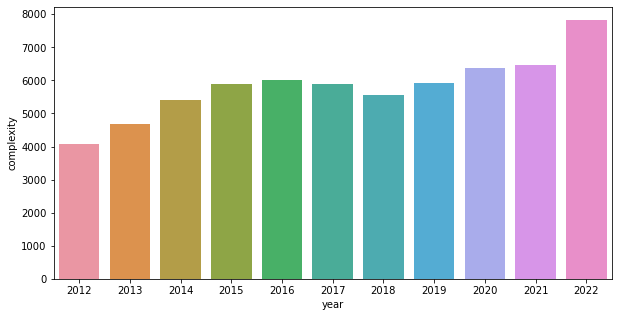

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.barplot(x="year", y="complexity", data=data, ax=axes)
fig.savefig("figures/Comp/scc_year_vs_complexity.jpg")


## Explore scc --by-file data


#show how seaborn/panda handle NAN values (they just ignore them!)
pure_2012_data = {"2012": []}
for i in loc_file_tracking.T["2012"]:
    if not pd.isna(i):
        pure_2012_data["2012"].append(i)
res = pd.DataFrame(pure_2012_data)
res
sb.boxplot(data=res)

In [6]:

loc_file_tracking = {"year": [],
                     "loc_per_file": [],
                     "complex_per_file": [],
                     "filename": []}
for file in os.scandir("data/LOC_and_Complexity/byfile"):
    file_year = file.name[:4]
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for odin_file in data_file:
            if odin_file["Name"] == "C" or odin_file["Name"] == "C++":
                for stats_file in odin_file["Files"]:
                    filename, filetype = stats_file["Filename"].split(".")
                    loc_file_tracking["year"].append(file_year)
                    loc_file_tracking["loc_per_file"].append(stats_file["Lines"])
                    loc_file_tracking["complex_per_file"].append(stats_file["Complexity"])
                    loc_file_tracking["filename"].append(stats_file["Filename"])
loc_file_tracking = pd.DataFrame(loc_file_tracking)
loc_file_tracking

,year,loc_per_file,complex_per_file,filename
0,2012,344,51,ast_optimizations.c
1,2012,89,16,errors.c
2,2012,113,7,queue.c
3,2012,876,186,activity_estimation.c
4,2012,199,13,hashtable.c
...,...,...,...,...
386,2022,206,36,LogicalOps.cpp
387,2022,488,0,enum_str.cpp
388,2022,716,73,Division.cpp
389,2022,646,40,FlipFlop.cpp


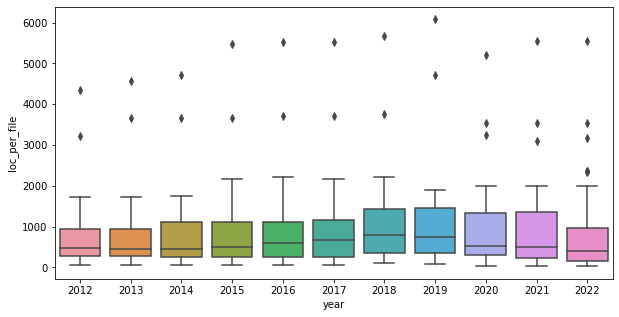

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="loc_per_file", data=loc_file_tracking, ax=axes)
fig.savefig("figures/LOC/scc_year_vs_loc_per_file.jpg")

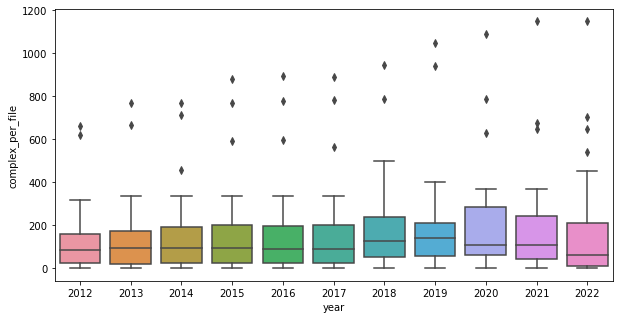

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="complex_per_file", data=loc_file_tracking, ax=axes)
fig.savefig("figures/Comp/scc_year_vs_complex_per_file.jpg")

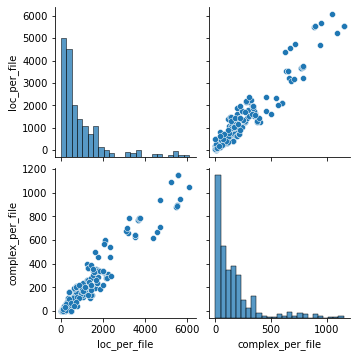

In [9]:
sb.pairplot(loc_file_tracking)

Explore lizard data

In [10]:
loc_per_method = {"file_name": [],
                  "year": [],
                  "avg_loc": [],
                  "avg_cyclo_comp": []}
for file in os.scandir("data/LOC_and_Complexity/byfile/bymethod"):
    file_year = file.name[:4]
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for odin_file in data_file:
            loc_per_method["file_name"].append(odin_file)
            loc_per_method["year"].append(file_year)
            loc_per_method["avg_loc"].append(data_file[odin_file]["file_info"]["avg_nloc"])
            loc_per_method["avg_cyclo_comp"].append(data_file[odin_file]["file_info"]["avg_cyclo_comp"])


loc_per_method = pd.DataFrame(loc_per_method)
loc_per_method

,file_name,year,avg_loc,avg_cyclo_comp
0,activity_estimation.c,2012,73.125000,13.125000
1,ast_optimizations.c,2012,76.000000,18.000000
2,ast_util.c,2012,36.722222,7.222222
3,errors.c,2012,21.000000,5.500000
4,hard_blocks.c,2012,24.700000,5.700000
...,...,...,...,...
348,subtractions.cpp,2022,58.777778,14.555556
349,Verilog.cpp,2022,0.000000,0.000000
350,VerilogReader.cpp,2022,6.000000,1.500000
351,VerilogWriter.cpp,2022,14.000000,3.142857


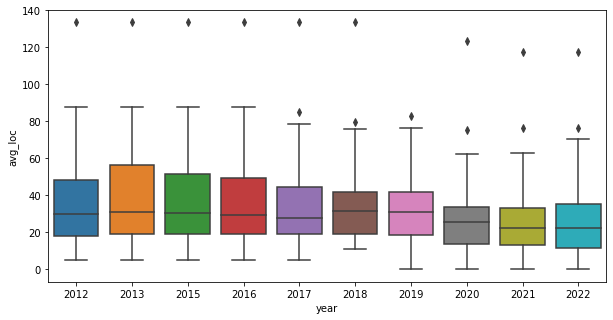

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="avg_loc", data=loc_per_method, ax=axes)
fig.savefig("figures/LOC/lizard_year_vs_avg_loc_per_method.jpg")

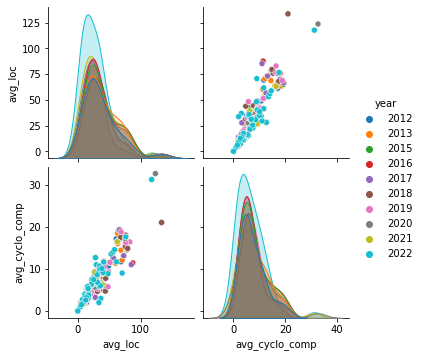

In [38]:
fig = sb.pairplot(data=loc_per_method, hue="year")
fig.savefig("figures/corr_year_vs_loc_per_method.jpg")

<AxesSubplot:>

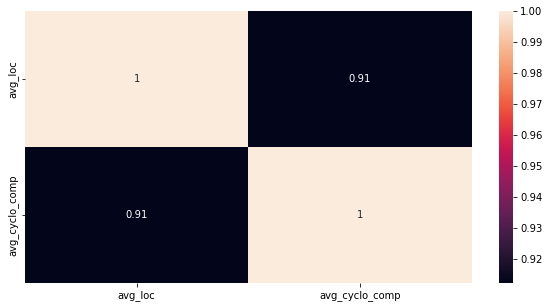

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.heatmap(data=loc_per_method.corr(),annot=True, ax=axes)

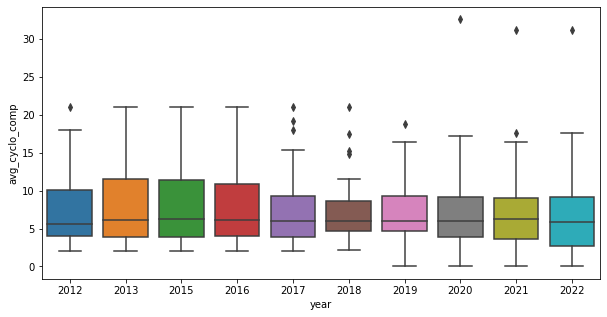

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.boxplot(x="year", y="avg_cyclo_comp", data=loc_per_method, ax=axes)
fig.savefig("figures/Comp/lizard_year_vs_avg_cyclo_per_method.jpg")